<a href="https://colab.research.google.com/github/ZeeMurphy/Data110/blob/main/ProjectMidterm_110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploratory Data Analysis of World Economic Freedom Index

Zivar S Murphy  
Professor Rebin Muhammad  
23 October 2024

The dataset I am analyzing originates from the Fraser Institute, which comprehensively overviews global economic freedom metrics. According to the Fraser Institute, “the cornerstones of economic freedom include personal choice, voluntary exchange coordinated by markets, the freedom to enter and compete in markets, and the protection of individuals and their property from aggression by others” (Fraser Institute). This Economic Freedom Dataset offers a unique opportunity to investigate global economic patterns and their potential links to various social, political, and economic indicators. For this project, I will specifically focus on selected variables within the dataset to maintain a clear scope and objective.
I chose the World Economic Freedom Index dataset for analysis because it provides a critical lens through which to examine how economic freedoms influence various socio-economic outcomes, including gender disparity. This dataset encompasses multiple dimensions of economic freedom, such as property rights and regulatory efficiency, allowing for a comprehensive exploration of their correlations with other important metrics. Additionally, its global perspective enables comparative analyses across different countries and regions, revealing insights into how policies affect diverse populations. The dataset's longitudinal nature also facilitates the observation of trends over time, making it a valuable resource for understanding the impact of economic conditions on social equity and informing policy discussions aimed at promoting inclusive growth.
The Economic Freedom Dataset encompasses a wealth of information, including the years covered, the number of countries, and key metrics such as the Economic Freedom Summary Index and its components. This index measures the degree of economic freedom present in five critical areas: the size of government, the legal system and security of property rights, sound money, freedom to trade internationally, and regulation. It is important to note that comprehensive data are available only with a two-year lag, influencing the index accordingly.
Spanning the years 1971 to 2021 and covering 165 countries, this dataset presents an extensive framework for analysis. To narrow my focus, I will examine ten countries with the highest and lowest Economic Freedom Summary Index scores. I aim to explore the relationships between these countries' economic structures, particularly comparing high and low scores across the Economic Freedom Summary Index, the Gender Disparity Index, and the World Bank Income Classification. This comparison will enable me to highlight differences in economic frameworks and investigate whether a correlation exists between economic freedom and gender disparity. By utilizing visualizations such as bar plots or KDE graphs, I intend to explore this relationship further, adding depth to my analysis. Additionally, integrating the World Bank Current Income Classification variable will enhance the project's scope by revealing how income classifications interact with both gender disparity and economic freedom.



I start by importing the necessary modules to conduct my analysis. After reading my dataset, I'll review its rows, columns, and variables. This dataset includes 4620 rows and 85 columns.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In [3]:
EFW_df=pd.read_csv('https://raw.githubusercontent.com/ZeeMurphy/Projects-Z/refs/heads/main/efotw-2023-master-index-data-for-researchers-iso.csv')


In [4]:
EFW_df.head()

,Year,ISO Code 2,ISO Code 3,Countries,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,1B Transfers and subsidies,...,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank,World Bank Region,"World Bank Current Income Classification, 1990-present"
0,2021,AL,ALB,Albania,7.60,31.0,1.0,7.76,13.62,7.13,...,3.59,5.31,6.81,5.62,6.25,6.23,6.97,51.0,Europe & Central Asia,UM
1,2021,DZ,DZA,Algeria,4.82,157.0,4.0,3.47,28.21,7.82,...,4.76,3.74,4.41,8.77,3.13,5.44,4.84,150.0,Middle East & North Africa,LM
2,2021,AO,AGO,Angola,5.38,149.0,4.0,7.18,15.59,9.70,...,4.64,4.29,3.10,7.92,1.25,4.09,4.73,153.0,Sub-Saharan Africa,LM
3,2021,AR,ARG,Argentina,4.77,158.0,4.0,5.69,20.65,5.54,...,4.50,4.86,6.14,5.73,2.92,4.93,5.30,143.0,Latin America & the Caribbean,UM
4,2021,AM,ARM,Armenia,7.58,33.0,1.0,6.47,17.99,7.32,...,6.02,5.56,5.59,9.30,5.00,6.63,6.94,52.0,Europe & Central Asia,UM


In [5]:
EFW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 85 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Year                                                         4620 non-null   int64  
 1   ISO Code 2                                                   4592 non-null   object 
 2   ISO Code 3                                                   4620 non-null   object 
 3   Countries                                                    4620 non-null   object 
 4   Economic Freedom Summary Index                               3941 non-null   float64
 5   Rank                                                         3941 non-null   float64
 6   Quartile                                                     3941 non-null   float64
 7   1A Government consumption                                    3962 non-null   f

In [6]:
EFW_df.describe()

,Year,Economic Freedom Summary Index,Rank,Quartile,1A Government consumption,data,1B Transfers and subsidies,data.1,1C Government investment,data.2,...,5Cii Bureacracy costs,5Ciii Impartial Public Administration,5Civ Tax compliance,5C Business regulations,5Di Market openness,5Dii Business Permits,5Diii Distorton of the business environment,5D Freedom to enter markets and compete,5 Regulation,Area 5 Rank
count,4620.000000,3941.000000,3941.000000,3941.000000,3962.000000,3962.000000,3586.000000,3586.000000,4076.000000,4076.000000,...,3044.000000,4381.00000,3602.000000,4487.00000,3683.000000,2692.000000,825.000000,3683.000000,4298.000000,4298.000000
mean,2004.500000,6.531094,72.315148,2.475768,5.792973,20.475008,7.667379,9.029470,6.790829,26.997988,...,5.316422,5.63399,5.564503,5.14651,5.535246,7.650743,5.260897,6.058360,6.176875,78.897394
std,13.389877,1.221003,43.216456,1.111424,2.311448,8.446212,2.090984,7.659898,3.389312,17.741345,...,2.307154,2.43971,2.200184,1.80905,2.026178,1.834572,2.336766,1.913279,1.448327,46.647225
min,1970.000000,1.870000,1.000000,1.000000,0.000000,1.680000,0.000000,0.000000,0.000000,-14.640000,...,0.000000,0.00000,0.000000,0.00000,0.290000,0.000000,0.000000,0.430000,0.610000,1.000000
25%,2000.750000,5.780000,36.000000,1.000000,4.380000,14.500000,6.192500,2.600000,4.650000,15.807500,...,3.780000,3.64000,4.420000,3.95000,4.070000,6.870000,3.750000,4.930000,5.280000,39.000000
50%,2007.500000,6.630000,71.000000,2.000000,6.030000,19.500000,8.380000,6.445000,7.940000,22.205000,...,5.400000,5.46000,5.690000,5.05000,5.620000,8.090000,5.000000,6.320000,6.320000,77.000000
75%,2014.250000,7.460000,106.000000,3.000000,7.500000,25.120000,9.430000,14.430000,9.770000,33.717500,...,6.890000,7.57000,6.850000,6.41000,6.960000,8.990000,7.500000,7.470000,7.180000,117.000000
max,2021.000000,9.280000,165.000000,4.000000,10.000000,66.550000,10.000000,37.200000,10.000000,471.960000,...,10.000000,10.00000,10.000000,9.93000,10.000000,10.000000,10.000000,9.990000,9.410000,165.000000


In [7]:
#Check for missing data:
missing_data_summary = EFW_df.isnull().sum()
print(missing_data_summary)


Year                                                        0
ISO Code 2                                                 28
ISO Code 3                                                  0
Countries                                                   0
Economic Freedom Summary Index                            679
                                                         ... 
5D Freedom to enter markets and compete                   937
5  Regulation                                             322
Area 5 Rank                                               322
World Bank Region                                           0
World Bank Current Income Classification, 1990-present    849
Length: 85, dtype: int64


In [8]:
# Filter the data for the year 2021
EFW_2021 = EFW_df[EFW_df['Year'] == 2021]

In this step, I visualize the Economic Freedom Index for the 10 countries with the highest and lowest scores in 2021. First, I filter the dataset for the year 2021 and then identify the top and bottom 10 countries based on their scores. To enhance visual comparison, I plot them next to each other using horizontal bar graphs.

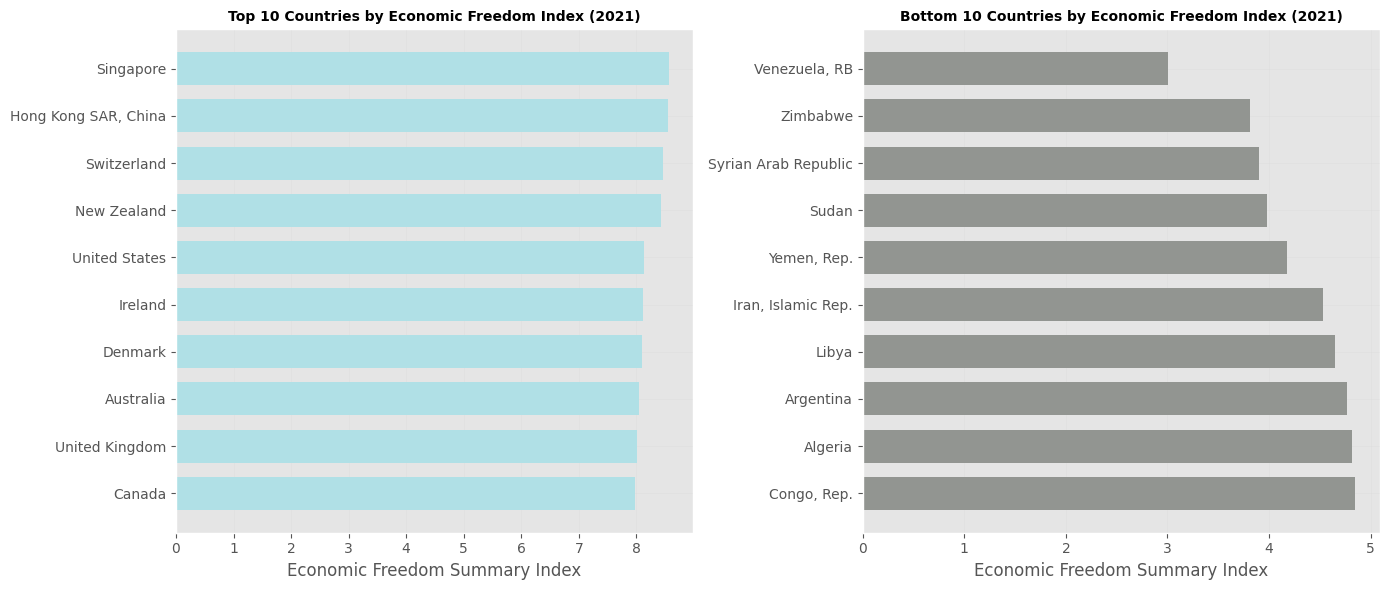

In [9]:
import matplotlib.pyplot as plt

# Filter the data for the year 2021
EFW_2021 = EFW_df[EFW_df['Year'] == 2021]

# The top and bottom 10 countries based on Economic Freedom Summary Index
TopEFI_2021 = EFW_2021.nlargest(10, 'Economic Freedom Summary Index')[['Countries', 'Economic Freedom Summary Index']]
LowEFI_2021 = EFW_2021.nsmallest(10, 'Economic Freedom Summary Index')[['Countries', 'Economic Freedom Summary Index']]

# figure and individual axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
# Plot for the top 10 countries
ax1.barh(TopEFI_2021['Countries'], TopEFI_2021['Economic Freedom Summary Index'], color='powderblue', height=0.7)
ax1.set_title('Top 10 Countries by Economic Freedom Index (2021)', fontsize=10, weight='bold')
ax1.set_xlabel('Economic Freedom Summary Index')
ax1.invert_yaxis()
ax1.grid(color='lightgray', linestyle='-', linewidth=0.5, alpha=0.3)

# Plot for the Bottom 10 countries
ax2.barh(LowEFI_2021['Countries'], LowEFI_2021['Economic Freedom Summary Index'], color='#929591', height=0.7)
ax2.set_title('Bottom 10 Countries by Economic Freedom Index (2021)', fontsize=10, weight='bold')
ax2.set_xlabel('Economic Freedom Summary Index')
ax2.invert_yaxis()

ax2.grid(color='lightgray', linestyle='-', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()


According to Fraser Institue, "The Gender Disparity Index (GDI) measures the degree to which women around the world have the same legal rights as men and is used to adjust the EFW index scores to account for any differences in access to economic rights." So, in the next step, we take a look at Gender Disparity Index for the top 10 and buttom 10 countries wiht highest and lowest Economic Freedom Summary Index.
The graph shows, the top countries all have a higher Gender Disparity Index, which shows a 100% correlation between the Economic Freedom Index and high gender equality in these countries. However, among 10 countries with lowest EFI in 2021, while Venezuela and Zimbabwe show a high Gender Disparity Index (GDI), indicating low gender inequality, they still rank low in Economic Freedom. This discrepancy suggests that high GDI alone doesn’t necessarily equate to broader economic freedom or prosperity which prompts looking at other factors. For example, Venezuela and Zimbabwe face significant economic constraints and instability due to high levels of government intervention, hyperinflation, and political turmoil, which severely limit economic freedom. Therefore, A high GDI, may not always translate in equal economic opportunities and the quality of economic institutions for both genders.

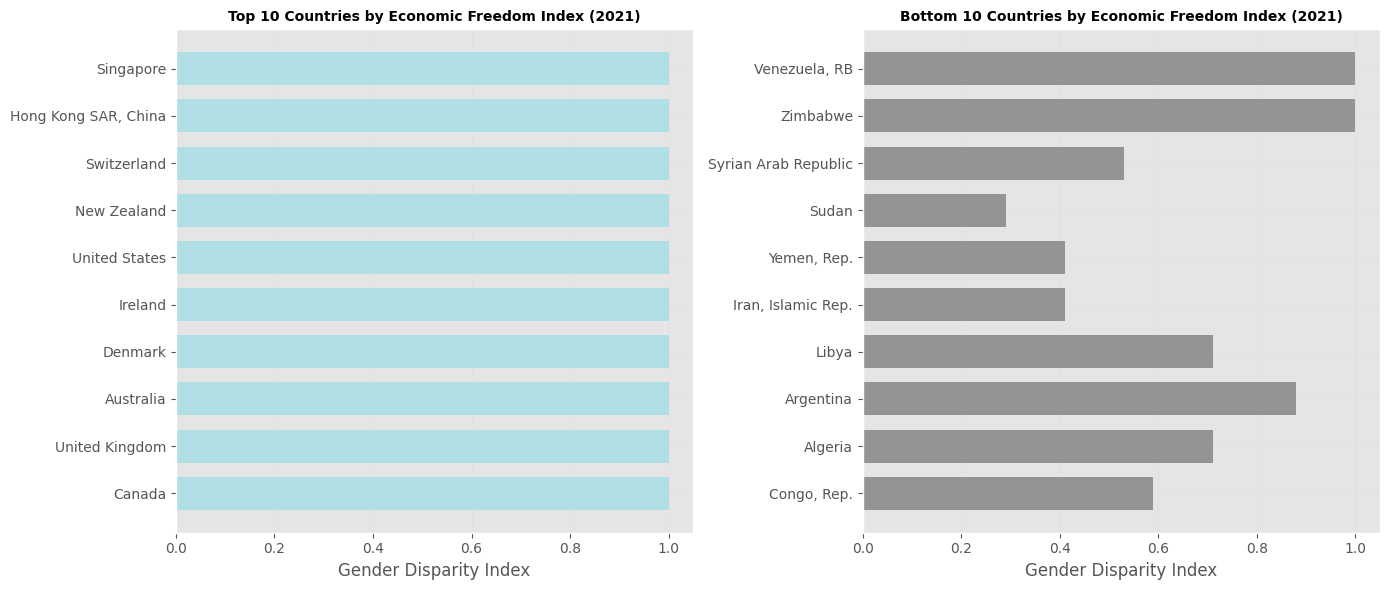

In [10]:

# Filter the data for the year 2021
EFW_2021 = EFW_df[EFW_df['Year'] == 2021]

# the top and bottom 10 countries based on Economic Freedom Summary Index
TopEFI_2021 = EFW_2021.nlargest(10, 'Economic Freedom Summary Index')[['Countries', 'Gender Disparity Index']]
LowEFI_2021 = EFW_2021.nsmallest(10, 'Economic Freedom Summary Index')[['Countries', 'Gender Disparity Index']]

# Set up the figure and individual axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot for the Top 10 countries
ax1.barh(TopEFI_2021['Countries'], TopEFI_2021['Gender Disparity Index'], color='powderblue', height=0.7)
ax1.set_title('Top 10 Countries by Economic Freedom Index (2021)', fontsize=10, weight='bold')
ax1.set_xlabel('Gender Disparity Index')
ax1.invert_yaxis()
ax1.grid(color='lightgray', linestyle='-', linewidth=0.5, alpha=0.3)
# Plot for the Bottom 10 countries
ax2.barh(LowEFI_2021['Countries'], LowEFI_2021['Gender Disparity Index'], color='#929591', height=0.7)
ax2.set_title('Bottom 10 Countries by Economic Freedom Index (2021)', fontsize=10, weight='bold')
ax2.set_xlabel('Gender Disparity Index')
ax2.invert_yaxis()
ax2.grid(color='lightgray', linestyle='-', linewidth=0.5, alpha=0.3)
# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The following graph illustrates the number of countries within each World Bank income classification for both the top and bottom groups based on their Economic Freedom Summary Index (EFI) in 2021. This analysis allows me to explore whether specific income classifications correlate with EFI. According to the graph, all the top 10 countries fall into the High-Income category, while the majority of the bottom 10 countries are classified as Lower Income or Lower middle-income. This plot shows that, indeed, there is a correlation between EFI and income.

In [11]:
# Filter data for the year 2021
EFW_2021 = EFW_df[EFW_df['Year'] == 2021]

# the top and bottom 10 countries by Economic Freedom Summary Index and include income classification
TopEFI_2021 = EFW_2021.nlargest(10, 'Economic Freedom Summary Index')[['Countries', 'World Bank Current Income Classification, 1990-present']]
TopEFI_2021['Category'] = 'Top 10'

LowEFI_2021 = EFW_2021.nsmallest(10, 'Economic Freedom Summary Index')[['Countries', 'World Bank Current Income Classification, 1990-present']]
LowEFI_2021['Category'] = 'Bottom 10'

# Combine DataFrames
combined_df = pd.concat([TopEFI_2021, LowEFI_2021])


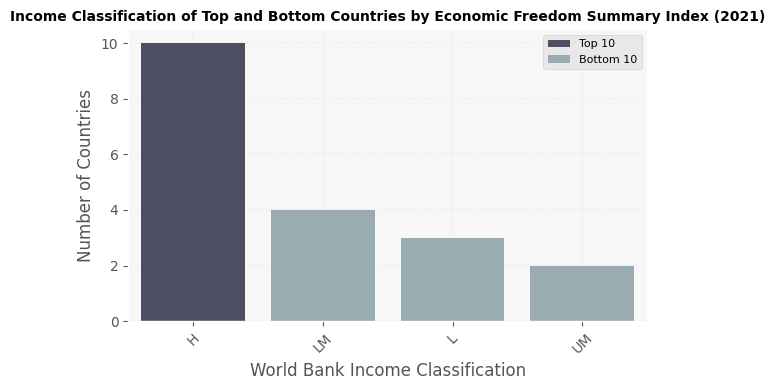

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df,
              x='World Bank Current Income Classification, 1990-present',
              hue='Category',
              palette='bone')

plt.title('Income Classification of Top and Bottom Countries by Economic Freedom Summary Index (2021)', fontsize=10, weight='bold')
plt.xlabel('World Bank Income Classification')
plt.ylabel('Number of Countries')
plt.legend(fontsize=8)
plt.xticks(rotation=45)
plt.gca().set_facecolor('#f7f7f7')
plt.grid(color='lightgray', linestyle='--', linewidth=0.2)
plt.tight_layout()
plt.show()


I decided to expand my analysis to a 10-year period between 2012 and 2021 to check for the trends over time and to visualize the correlation between the Economic Freedom Summary Index (EFI), Gender Disparity Index, and World Bank Income Classification for all the countries over this period. First, we filter the dataset for the years 2012-2021 to create a subset and graph a scatter plot to examine the relationship between EFI and the Gender Disparity Index. I found out that a 3D scatter plot would provide better visibility. We can see the points clustered tightly across years without significant shifts; this could suggest that the indices are relatively stable, with no major year-over-year changes in economic freedom or gender disparity across the period analyzed (2012-2021). This would mean that, on a global scale, economic freedom and gender disparity remain largely consistent over time.




In [13]:
# Filter the dataset for years 2012-2021
filtered_data = EFW_df[(EFW_df['Year'] >= 2012) & (EFW_df['Year'] <= 2021)]
# Count missing values for specific columns in the filtered dataset
#missing_counts = filtered_data[['Economic Freedom Summary Index', 'Gender Disparity Index',
                                #'World Bank Current Income Classification, 1990-present']].isnull().sum()

# Display missing value counts for each column
#print(missing_counts)

# Drop rows with missing values in the columns of interest
#filtered_data = filtered_data.dropna(subset=['Economic Freedom Summary Index',
                                              #'Gender Disparity Index','World Bank Current Income Classification, 1990-present'])

# I decided to not to remove the rows because proportionally the number of missing data was insignificant.


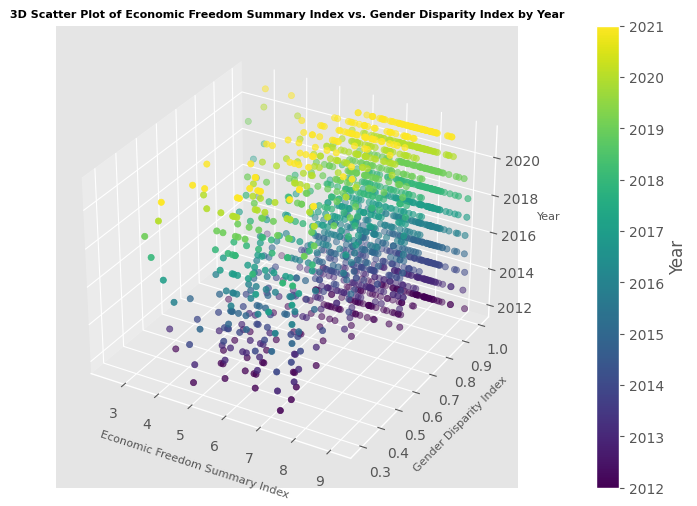

In [14]:

# 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(
    filtered_data['Economic Freedom Summary Index'],
    filtered_data['Gender Disparity Index'],
    filtered_data['Year'],
    c=filtered_data['Year'],  # Color by year
    cmap='viridis',  # Color map for the years
    marker='o'
)

ax.set_title('3D Scatter Plot of Economic Freedom Summary Index vs. Gender Disparity Index by Year', fontsize=8, weight='bold')
ax.set_xlabel('Economic Freedom Summary Index', fontsize=8 )
ax.set_ylabel('Gender Disparity Index', fontsize=8)
ax.set_zlabel('Year', fontsize=8)

cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Year')

plt.show()


At this point, we use the KDE plot to see the relationship between EFI and income classification and Gender Disparity. The KDE plot reveals significant overlap, suggesting that other factors likely influence a nation's income level beyond the EFI alone. However, most high-income countries have an EFI greater than 6, while lower EFIs are increasingly associated with lower-income classifications. This bi-modal graph shows the majority of the countries classified as low-income have an EFI between 5 and 6. And the majority of the countries classified a high-income score an EFI of 8.

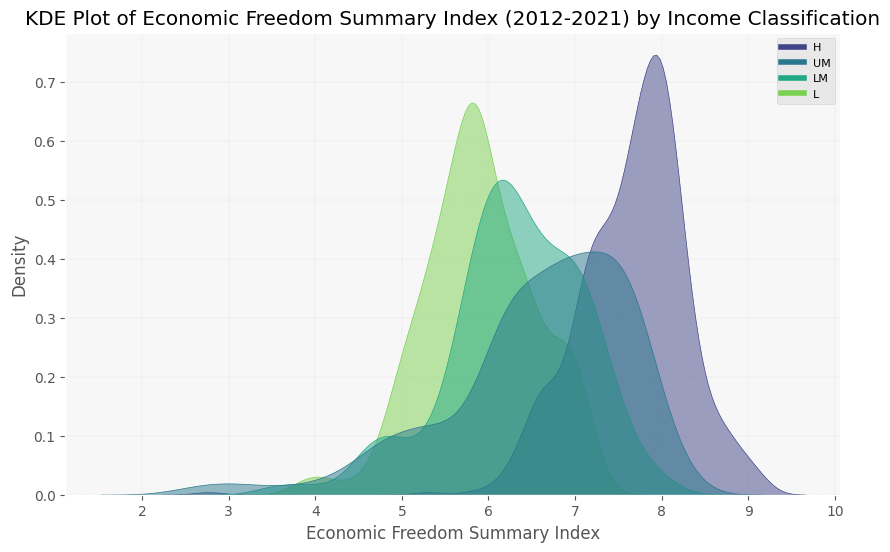

In [15]:
# Filter the dataset for years 2012-2021
filtered_data = EFW_df[(EFW_df['Year'] >= 2012) & (EFW_df['Year'] <= 2021)]

# Drop rows with missing values in the columns of interest
filtered_data = filtered_data.dropna(subset=['Economic Freedom Summary Index',
                                              'World Bank Current Income Classification, 1990-present'])

# Set the color palette based on the World Bank Current Income Classification
class_colors = {
    'H': sns.color_palette("viridis", n_colors=4)[0],
    'UM': sns.color_palette("viridis", n_colors=4)[1],
    'LM': sns.color_palette("viridis", n_colors=4)[2],
    'L': sns.color_palette("viridis", n_colors=4)[3]
}

# Create a new column for color mapping
filtered_data['Color'] = filtered_data['World Bank Current Income Classification, 1990-present'].map(class_colors)

# Plotting the KDE
plt.figure(figsize=(10, 6))

# the `hue` parameter for legends
sns.kdeplot(data=filtered_data,
             x='Economic Freedom Summary Index',
             hue='World Bank Current Income Classification, 1990-present',
             fill=True,
             common_norm=False,
             palette=class_colors,
             alpha=0.5)

plt.title('KDE Plot of Economic Freedom Summary Index (2012-2021) by Income Classification')
plt.xlabel('Economic Freedom Summary Index')
plt.ylabel('Density')

# handles for legend using the crest palette
handles = [plt.Line2D([0], [0], color=class_colors[cls], lw=4) for cls in class_colors]
plt.legend(handles=handles, labels=class_colors.keys(), fontsize=8)

plt.gca().set_facecolor('#f7f7f7')
plt.grid(color='lightgray', linestyle='--', linewidth=0.2)

plt.show()



Now, we can examine whether there is a relationship between gender disparity and income classification. Although some overlap is visible in the following KDE plot, the data generally show that higher gender equality aligns with higher income classifications. Specifically, countries with high-income classifications tend to score better on the gender equality index, indicating a trend where economic prosperity is often associated with improved gender parity.
Interestingly, the visualization also reveals the presence of high-income countries with lower gender equality scores, suggesting that wealth alone does not guarantee gender equality. This anomaly could warrant further exploration into the cultural, legal, or policy-based factors that may limit gender equality despite a nation's high economic standing. Countries with a high world income classification that still exhibit significant gender disparities in economic opportunities and rights, primarily because the overall economic prosperity of a country does not directly translate to equal access to economic freedoms for all citizens. According to the Fraser Institute, nations that support strong property rights, open markets, and individual freedoms tend to have higher economic prosperity, but there is often an uneven distribution of these benefits. High-income countries may still restrict women’s economic freedoms due to cultural norms or legal limitations that prevent equal participation in the workforce, entrepreneurship, or ownership of assets.
Furthermore, the Fraser Institute notes that even within economically free environments, systemic gender biases or legal restrictions can reduce women's economic freedom, affecting their income and opportunities. High-income countries with low gender disparity scores can reflect this trend if economic policies and opportunities are accessible mostly to men. At the same time, women face institutional or legal barriers to equivalent economic participation and advancement.



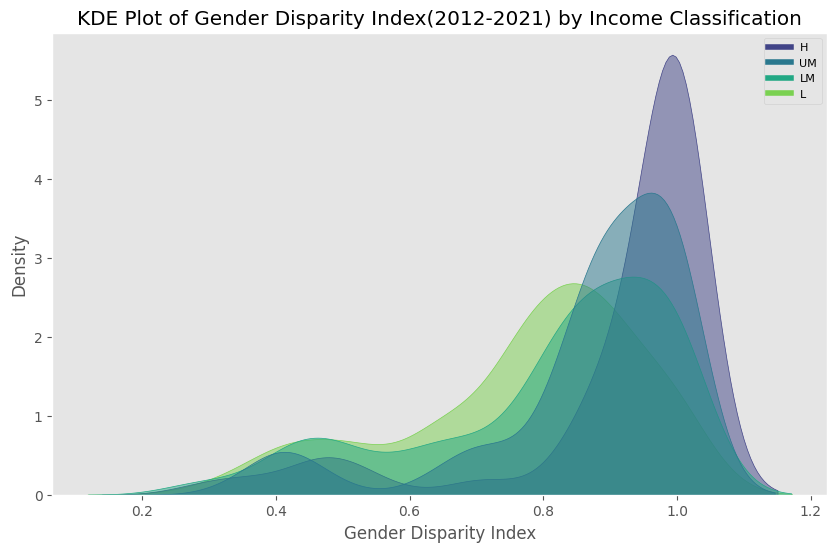

In [16]:

# Filter the dataset for years 2012-2021
filtered_data = EFW_df[(EFW_df['Year'] >= 2012) & (EFW_df['Year'] <= 2021)]

# Drop rows with missing values in the columns of interest
filtered_data = filtered_data.dropna(subset=['Gender Disparity Index',
                                              'World Bank Current Income Classification, 1990-present'])

class_colors = {
    'H': sns.color_palette("viridis", n_colors=4)[0],
    'UM': sns.color_palette("viridis", n_colors=4)[1],
    'LM': sns.color_palette("viridis", n_colors=4)[2],
    'L': sns.color_palette("viridis", n_colors=4)[3]
}

# a new column for color mapping
filtered_data['Color'] = filtered_data['World Bank Current Income Classification, 1990-present'].map(class_colors)

plt.figure(figsize=(10, 6))

sns.kdeplot(filtered_data,
             x='Gender Disparity Index',
             hue='World Bank Current Income Classification, 1990-present',
             fill=True,
             common_norm=False,
             palette=class_colors,
             alpha=0.5)

plt.title('KDE Plot of Gender Disparity Index(2012-2021) by Income Classification')
plt.xlabel('Gender Disparity Index')
plt.ylabel('Density')

handles = [plt.Line2D([0], [0], color=class_colors[cls], lw=4) for cls in class_colors]
plt.legend(handles, class_colors.keys(), fontsize=8)

plt.grid()
plt.show()

The findings through this analysis reveal a strong correlation between higher economic freedom and improved gender equality and high income, with all top 10 countries exhibiting high-income classification and EFI. However, notable exceptions like Venezuela and Zimbabwe highlight that a high GDI does not necessarily equate to economic prosperity, as these nations struggle with significant economic challenges. Additionally, kernel density estimation (KDE) graphs created for the ten-year period from 2012 to 2021 show some overlap among income levels and EFI scores, suggesting that factors beyond EFI impact income classifications. The presence of high-income countries with low gender equality scores indicates systemic barriers that warrant further investigation into cultural and legal factors affecting women's economic rights and opportunities. Future research should focus on several key areas to enhance understanding of gender equality and economic prosperity. First, the cultural norms and legal frameworks should be investigated as these insights could inform targeted policy interventions. Cross-national comparisons between countries with similar EFI scores but differing GDI outcomes could uncover the underlying reasons for these disparities, informing more effective interventions.






